# Part 2

### Q1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'/Users/sina/Desktop/12-2022 Instacart Basket Analysis'

In [3]:
# importing pickle file with most recent data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,registration_date,number_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.shape

(32404859, 33)

### Q2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

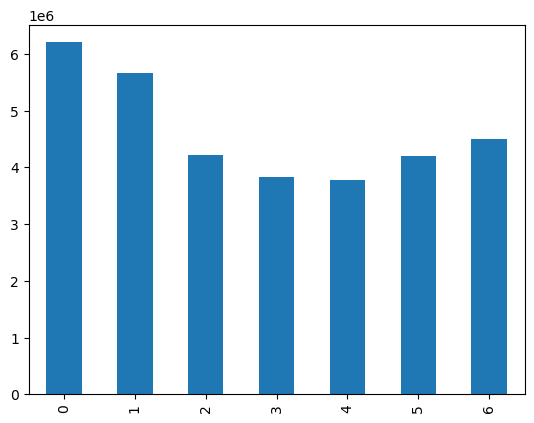

In [7]:
# Create a bar chart sorted on index (0-6)
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

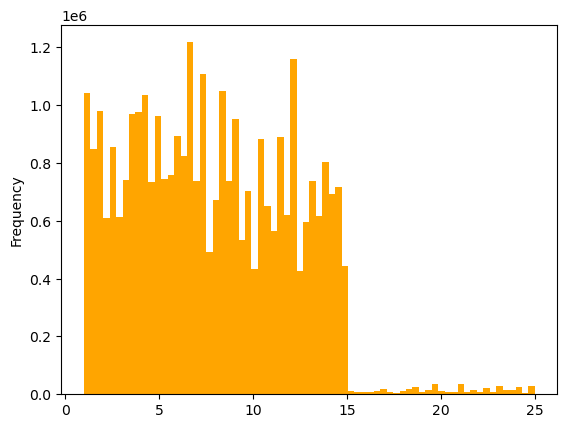

In [9]:
# Creating histogram to show frequency of prices
hist = df['prices'].plot.hist(bins = 70, color = 'orange')

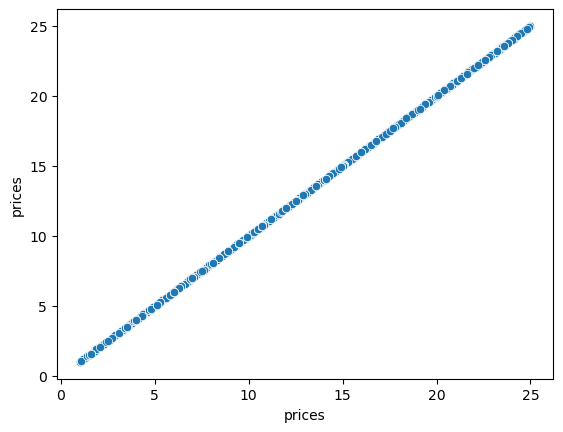

In [10]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [11]:
# line chart using subset

In [12]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
# Store 70% of the sample in data frame big
big = df[dev]

In [14]:
# Store 30% of the sample in data frame small
small = df[~dev]

In [16]:
# Checking length is correct
len(big)+len(small)

32404859

In [18]:
# Creating new data frame with just the columns needed for the line chart
df_small = small[['orders_day_of_week','prices']]

In [19]:
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


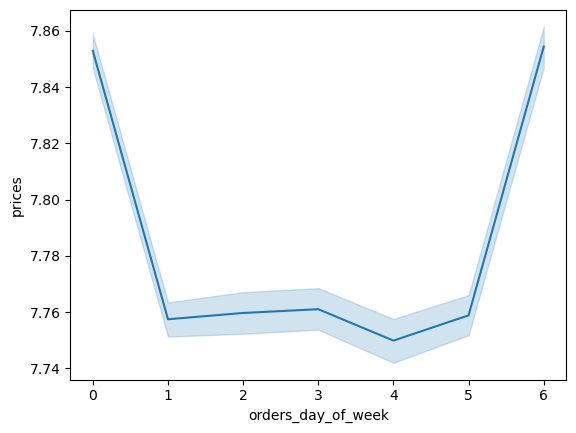

In [20]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

### Q3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

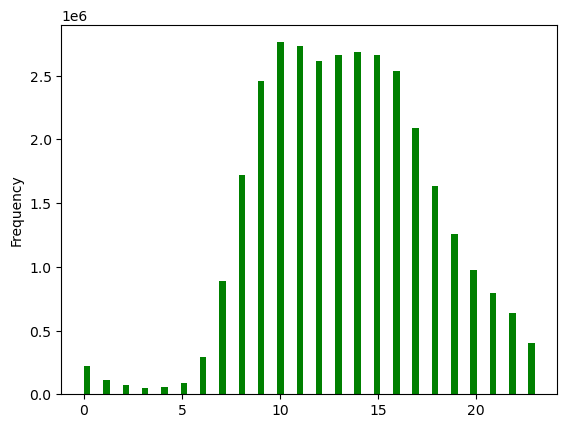

In [21]:
# Create a histogram of the “order_hour_of_day” column

hist2 = df['order_hour_of_day'].plot.hist(bins = 70, color = 'green')

#### Most orders are placed at 10 am to 5 pm, but starting to drop off at 5pm.  There are few orders placed between midnight and 7am.

### Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

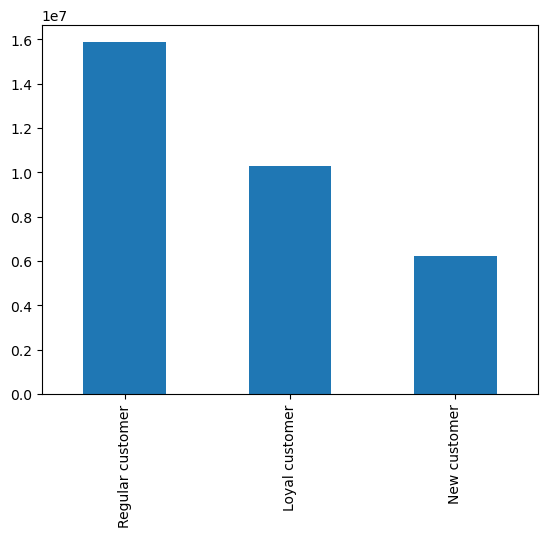

In [22]:
# Create a bar chart from the “loyalty_flag” column.
bar2 = df['loyalty_flag'].value_counts().plot.bar()

#### Our largest customer base are from regular customers, meaning they have placed between 10 and 40 orders.  

### Q3. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [23]:
# Creating new data frame with just the columns needed for the line chart
df_small_2 = small[['order_hour_of_day','prices']]

In [24]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


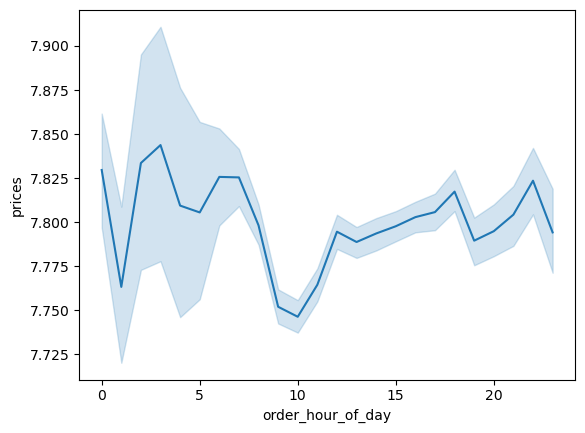

In [25]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

#### This line chart above shows frequency of orders per hour: Customers spend more in the early morning. We saw that during this time period, there are not many orders coming through.  This indicates that these are higher value orders. 
#### We see that a high frequency of orders with a low expenditure during the day (particularly 10-11am) and a low frequency of orders with a high expenditure between 12-7am.

### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [26]:
# Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['age','number_dependants']]

In [27]:
df_small_3

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


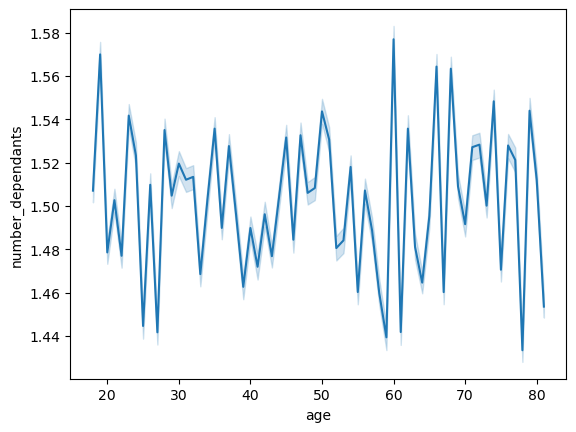

In [28]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'number_dependants')

#### There is no clear connection between age and number of dependents for Instacart customers. Based on the line chart, it is too random. 

### Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

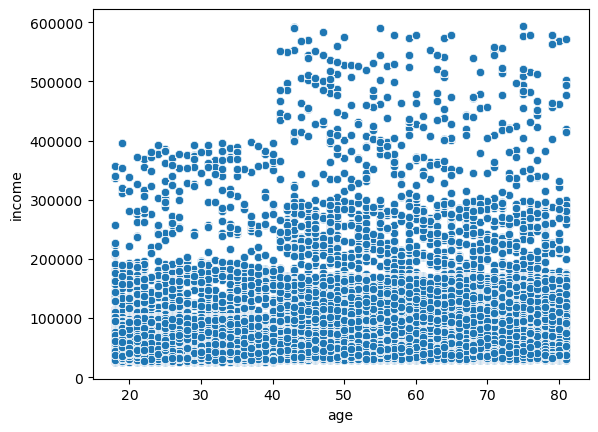

In [29]:
# You’ll also need to explore whether there’s a connection between age and spending power (income).

scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df)

#### This scatterplot shows the relationship between age and spending power. We can see that
1. The majority of customers aged 20-40 have an income of upto 200,000 USD

2. Some of  the 40+ age group's income rises to 300,000 USD, although the concentration of the dots shows that there are still more customers that fall into to still upto 200,000 USD bracket. 

### Q8. Export your visualizations as “.png” files in your relevant project folder.

In [31]:
# Exporting charts to folder as image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

In [44]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [35]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_exp.png'))

In [36]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','exp_hour_of_day.png'))

In [39]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [40]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [41]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_no_of_dependants.png'))

In [37]:
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [43]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))